In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [26]:
dataTrain = pd.read_csv("data/challenge1_train.csv")


In [27]:
dataTrain.head()

,id,target,f0,f1,f2,f3,f4,f5,f6,f7,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
0,0,0,I,AU,134e98eb8,be42001f3,6.8928,B,0.0,R,...,3.0,be0264098,3.0,0.0,B,N,51.0,1d2ee04de,m,1.0
1,1,1,N,NaN,232792002,3aad93cab,6.8098,A,1.0,G,...,1.0,71fb03996,3.0,1.0,F,N,10.0,e06abf51f,k,1.0
2,2,0,P,JP,64e2a3589,90116a97d,6.7761,A,0.0,R,...,2.0,bf987f83f,3.0,0.0,C,S,16.0,5d1ac7760,c,0.0
3,3,0,K,IT,960cdb2ef,dc4ee566b,6.9302,A,0.0,R,...,3.0,d40fcead7,2.0,0.0,D,N,63.0,b0ab8b134,i,1.0
4,4,0,H,AU,8377590c9,f09cc205f,7.0238,A,1.0,G,...,6.0,NaN,2.0,1.0,A,S,26.0,0764632bc,h,1.0


In [28]:
dataTrain.describe()

,id,target,f4,f6,f8,f10,f16,f17,f19,f21,f22,f25,f28
count,50000.000000,50000.00000,48594.000000,48457.000000,48522.000000,48492.000000,48488.000000,48545.000000,48447.000000,48510.000000,48497.000000,48501.000000,48535.000000
mean,24999.500000,0.18728,6.988378,0.536847,4.112032,1.721665,6.362399,0.409113,4.120689,1.947784,0.628328,62.147378,0.537406
std,14433.901067,0.39014,0.152945,0.656913,1.851792,3.427500,3.455422,0.185697,2.034561,0.852700,0.483257,33.086578,0.498604
min,0.000000,0.00000,6.521800,0.000000,1.000000,0.000000,1.000000,0.100000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,12499.750000,0.00000,6.870225,0.000000,3.000000,0.000000,3.000000,0.200000,2.000000,1.000000,0.000000,32.000000,0.000000
50%,24999.500000,0.00000,6.987500,0.000000,5.000000,0.000000,6.000000,0.500000,5.000000,2.000000,1.000000,65.000000,1.000000
75%,37499.250000,0.00000,7.102300,1.000000,6.000000,1.000000,8.000000,0.600000,6.000000,3.000000,1.000000,94.000000,1.000000
max,49999.000000,1.00000,7.479400,2.000000,6.000000,11.000000,12.000000,0.600000,7.000000,3.000000,1.000000,104.000000,1.000000


In [29]:
dataTrain

,id,target,f0,f1,f2,f3,f4,f5,f6,f7,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
0,0,0,I,AU,134e98eb8,be42001f3,6.8928,B,0.0,R,...,3.0,be0264098,3.0,0.0,B,N,51.0,1d2ee04de,m,1.0
1,1,1,N,NaN,232792002,3aad93cab,6.8098,A,1.0,G,...,1.0,71fb03996,3.0,1.0,F,N,10.0,e06abf51f,k,1.0
2,2,0,P,JP,64e2a3589,90116a97d,6.7761,A,0.0,R,...,2.0,bf987f83f,3.0,0.0,C,S,16.0,5d1ac7760,c,0.0
3,3,0,K,IT,960cdb2ef,dc4ee566b,6.9302,A,0.0,R,...,3.0,d40fcead7,2.0,0.0,D,N,63.0,b0ab8b134,i,1.0
4,4,0,H,AU,8377590c9,f09cc205f,7.0238,A,1.0,G,...,6.0,NaN,2.0,1.0,A,S,26.0,0764632bc,h,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,0,N,DE,6ad63ead6,b6e2836eb,6.8800,A,0.0,R,...,5.0,d4ec6187c,3.0,0.0,F,N,NaN,0da2378c8,c,1.0
49996,49996,0,K,JP,b568b6cd8,7353b6574,6.7799,A,0.0,R,...,6.0,671bf95ca,3.0,1.0,F,S,104.0,7e1c4cff1,n,1.0
49997,49997,0,R,AU,336f3d094,5b32753e5,6.8271,A,0.0,R,...,2.0,32039aaad,1.0,NaN,D,N,104.0,41afb892d,e,1.0
49998,49998,0,A,CN,939c262c3,180350489,7.2064,A,0.0,R,...,5.0,45d05d91a,1.0,1.0,A,N,48.0,e5b00a0e0,k,0.0


In [61]:
cols = list(dataTrain.columns)
if(cols[0] == "id"):
    cols.pop(0)

dataTrain = dataTrain[cols]

hexCols = ["f2", "f3", "f13", "f18", "f20", "f26"]

In [105]:
displayCols = []
displayThreshold = 30
print('{0:9} | {1:11} |'.format("variable", "uniqueCount"))
for col in cols:
    count = len(set(dataTrain[col]))
    if count <= displayThreshold:
        displayCols.append(col)
    print(f'{col:9} | {count:11} |')

variable  | uniqueCount |
target    |           2 |
f0        |          27 |
f1        |           6 |
f2        |        1500 |
f3        |        1207 |
f4        |        8429 |
f5        |           3 |
f6        |        1546 |
f7        |           4 |
f8        |        1484 |
f9        |         191 |
f10       |        1512 |
f11       |         191 |
f12       |           7 |
f13       |         223 |
f14       |           3 |
f15       |          27 |
f16       |        1524 |
f17       |        1461 |
f18       |         223 |
f19       |        1560 |
f20       |        2168 |
f21       |        1493 |
f22       |        1505 |
f23       |           7 |
f24       |           3 |
f25       |        1603 |
f26       |         223 |
f27       |          16 |
f28       |        1467 |


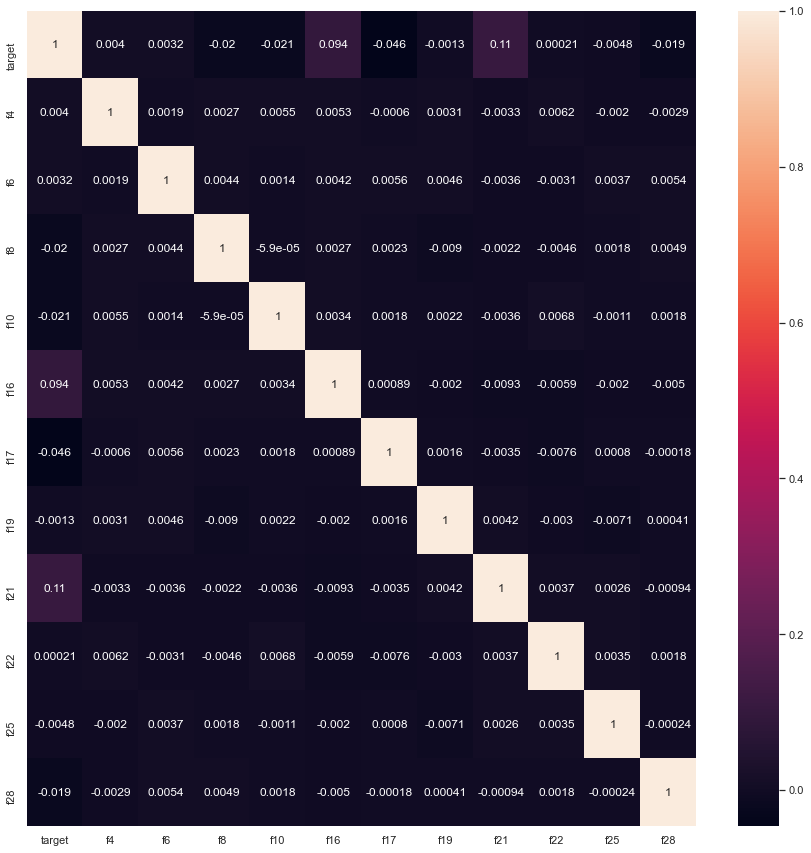

In [94]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corrMatrix, annot=True,  ax=ax)

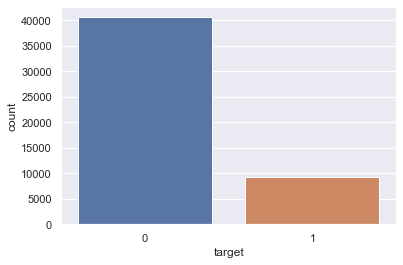

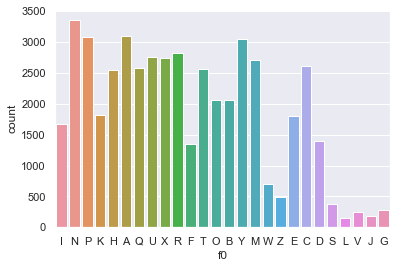

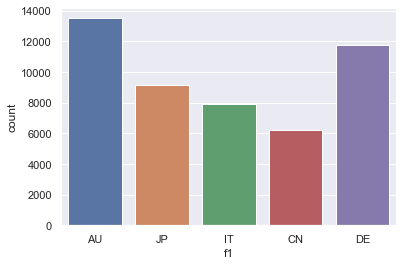

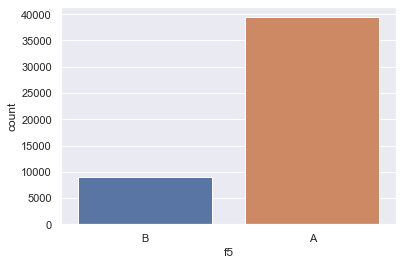

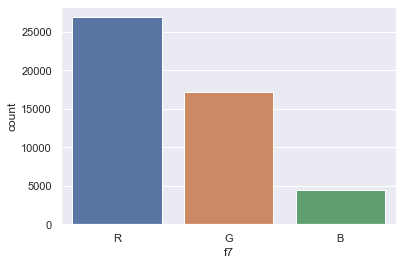

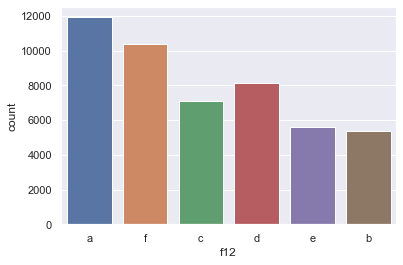

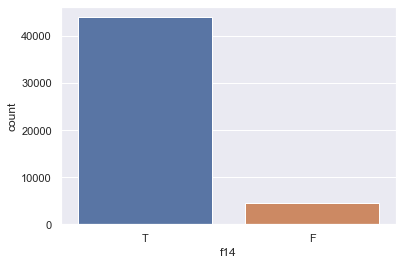

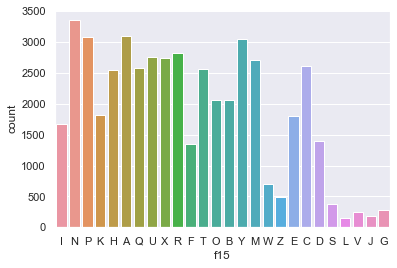

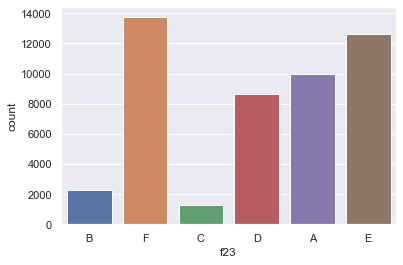

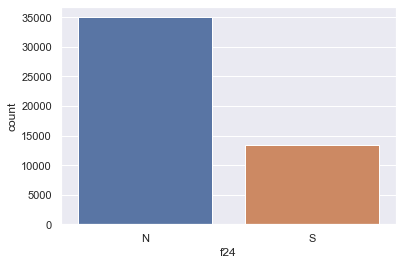

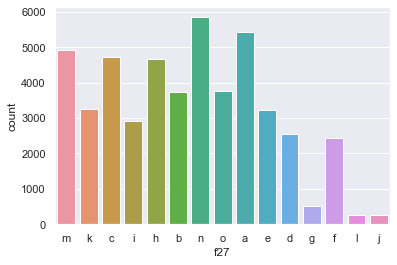

In [106]:
# displayCols = ["target", "f0", "f1", "f5", "f6", "f16"]

for col in displayCols:
    sns.set(style="darkgrid")
    ax = sns.countplot(x=col, data=dataTrain)
    plt.show()

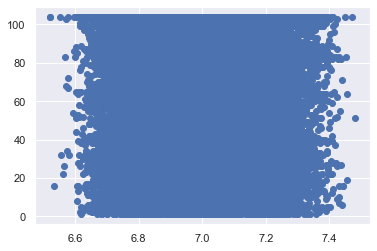

In [107]:
plt.plot(dataTrain["f4"], dataTrain["f25"], 'o')


In [108]:
#Get barchart of hex values, with a given thickness. This could prove that most of them are categorical
